## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [161]:
import pandas as pd
import numpy as np

In [162]:
st_df=pd.read_csv("Student_Data-1.csv",delimiter=";")
st_df.head(10)


school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [163]:
st_df.rename_axis('number').head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1     1      5        2  15  14  15  
4       ...      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [164]:
st_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [165]:
st_df.select_dtypes(exclude=[np.number]).head(10)

school sex address famsize Pstatus      Mjob      Fjob      reason guardian  \
0     GP   F       U     GT3       A   at_home   teacher      course   mother   
1     GP   F       U     GT3       T   at_home     other      course   father   
2     GP   F       U     LE3       T   at_home     other       other   mother   
3     GP   F       U     GT3       T    health  services        home   mother   
4     GP   F       U     GT3       T     other     other        home   father   
5     GP   M       U     LE3       T  services     other  reputation   mother   
6     GP   M       U     LE3       T     other     other        home   mother   
7     GP   F       U     GT3       A     other   teacher        home   mother   
8     GP   M       U     LE3       A  services     other        home   mother   
9     GP   M       U     GT3       T     other     other        home   mother   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  
5        no    yes  yes        yes     yes    yes      yes       no  
6        no     no   no         no     yes    yes      yes       no  
7       yes    yes   no         no     yes    yes       no       no  
8        no    yes  yes         no     yes    yes      yes       no  
9        no    yes  yes        yes     yes    yes      yes       no

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [166]:
st_df.var().T

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [167]:
st_df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)

In [168]:

st_df.head()


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet romantic goout Walc health absences  G1  G2  G3  
0    yes       no       no     4    1      3        6   5   6   6  
1    yes      yes       no     3    1      3        4   5   5   6  
2    yes      yes       no     2    3      3       10   7   8  10  
3    yes      yes      yes     2    1      5        2  15  14  15  
4    yes       no       no     2    2      5        4   6  10  10  

[5 rows x 27 columns]

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [169]:
df1 = st_df.dtypes==object


In [170]:
categorical_cols = st_df.columns[df1].tolist()


In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [172]:
df = st_df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()

school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0       0    0        1        0        0     0     4       0         1   
1       0    0        1        0        1     0     2       0         0   
2       0    0        1        1        1     0     2       2         1   
3       0    0        1        0        1     1     3       1         1   
4       0    0        1        0        1     2     2       1         0   

   schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  
0          1       0     0           0        1       1         0         0  
1          0       1     0           0        0       1         1         0  
2          1       0     1           0        1       1         1         0  
3          0       1     1           1        1       1         1         1  
4          0       1     1           0        1       1         0         0

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [173]:
import numpy as np

In [174]:
st_df['G1']=pd.DataFrame(np.where(st_df["G1"]>= 10, 1, 0))


In [175]:
st_df['G2']=pd.DataFrame(np.where(st_df['G2']>= 10, 1, 0))


In [176]:
st_df['G3']=pd.DataFrame(np.where(st_df['G3']>= 10, 1, 0))


In [177]:
st_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet romantic goout Walc health absences G1 G2 G3  
0    yes       no       no     4    1      3        6  0  0  0  
1    yes      yes       no     3    1      3        4  0  0  0  
2    yes      yes       no     2    3      3       10  0  0  1  
3    yes      yes      yes     2    1      5        2  1  1  1  
4    yes       no       no     2    2      5        4  0  1  1  

[5 rows x 27 columns]

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [178]:
X=st_df.drop('G3',axis=1)
y=st_df.iloc[:,-1]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [179]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

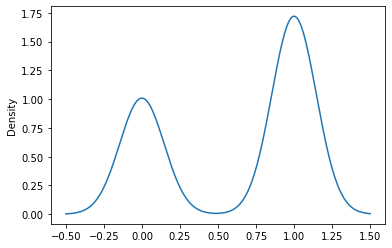

In [180]:
st_df["G2"].plot(kind='kde')

C:\Users\Abubakar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


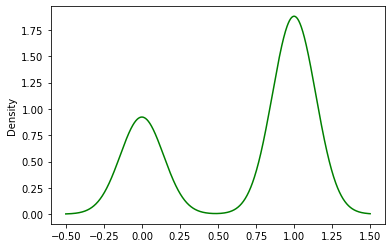

In [181]:
st_df["G3"].plot(kind='kde',colors='green')

from the above graphs we observe that both the columns having same distribution 


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

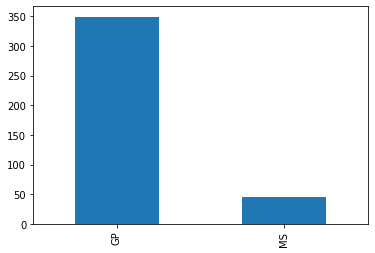

In [182]:
st_df['school'].value_counts().plot(kind='bar')

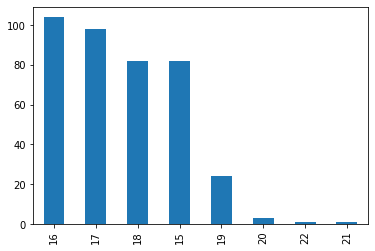

In [183]:
st_df['age'].value_counts().plot(kind='bar')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [184]:

from sklearn.model_selection import train_test_split

In [185]:
train_set, test_set, train_labels,test_labels = train_test_split(X, y, test_size=0.25,random_state=1)

In [186]:
for feature in st_df.columns: 
    if st_df[feature].dtype == 'object': 
        st_df[feature] = pd.Categorical(st_df[feature]).codes

In [187]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int8
sex           395 non-null int8
age           395 non-null int64
address       395 non-null int8
famsize       395 non-null int8
Pstatus       395 non-null int8
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int8
Fjob          395 non-null int8
reason        395 non-null int8
guardian      395 non-null int8
schoolsup     395 non-null int8
famsup        395 non-null int8
paid          395 non-null int8
activities    395 non-null int8
nursery       395 non-null int8
higher        395 non-null int8
internet      395 non-null int8
romantic      395 non-null int8
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int32
G2            395 non-null int32
G3            395 non-null int32
dtypes: int32(3), int

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [188]:
X=st_df.drop('G3',axis=1)
y=st_df.pop('G3')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



In [189]:
train_set, test_set, train_labels,test_labels = train_test_split(X, y,test_size=0.25,random_state=1)
model.fit(test_set,test_labels)
A=model.score(train_set,train_labels)

B=model.score(test_set,test_labels)
print("train_result:",A)
print("test_result:",B)


train_result: 0.8716216216216216
test_result: 0.9090909090909091


C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive bayes with Iris data

### Import Iris.csv

In [190]:
iris_df=pd.read_csv("iris.csv")

In [191]:
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [192]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [193]:
iris_df.reset_index().head()

index  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      0   1            5.1           3.5            1.4           0.2   
1      1   2            4.9           3.0            1.4           0.2   
2      2   3            4.7           3.2            1.3           0.2   
3      3   4            4.6           3.1            1.5           0.2   
4      4   5            5.0           3.6            1.4           0.2   

       Species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [194]:
X=iris_df.drop('Species',axis=1)
y=iris_df.iloc[:-1]

### Find the distribution of target variable (Class)

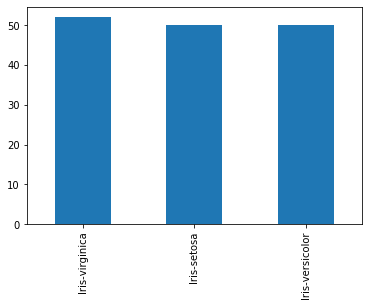

In [195]:
iris_df['Species'].value_counts().plot(kind='bar')

### Plot the distribution of target variable using histogram

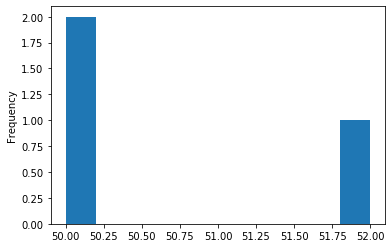

In [196]:
iris_df['Species'].value_counts().plot(kind='hist')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\Abubakar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Abubakar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


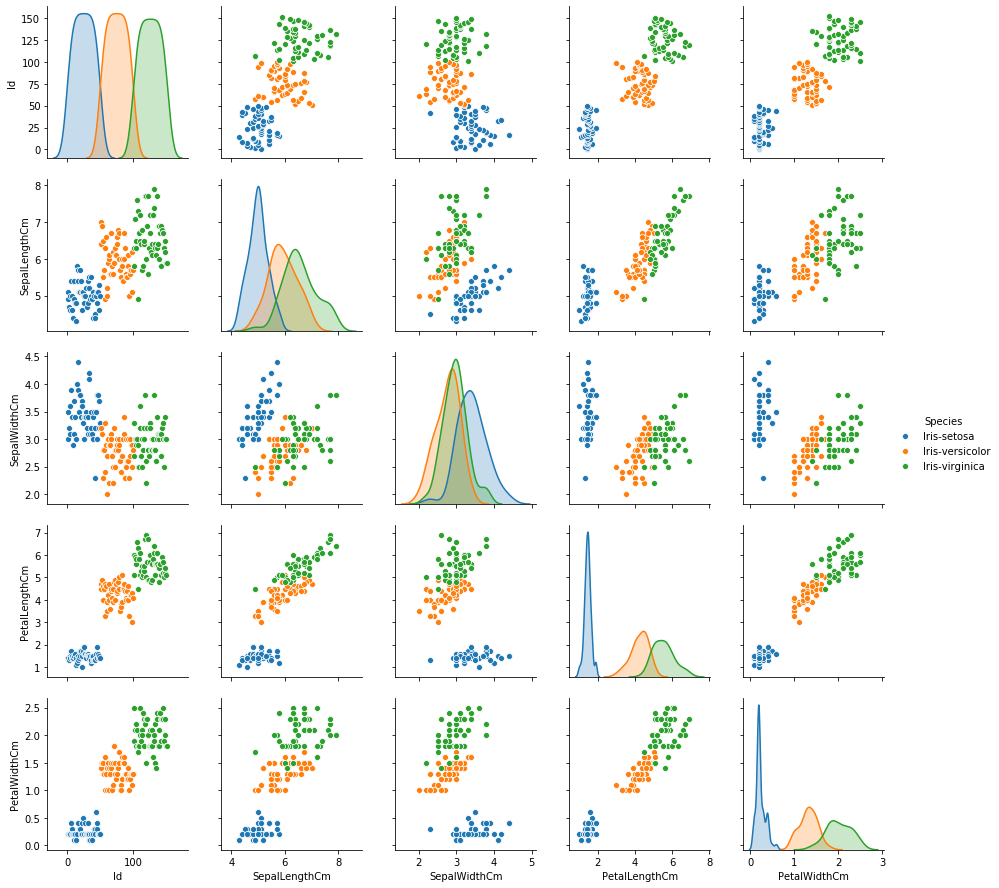

In [197]:
sns.pairplot(iris_df,hue='Species')

in the sepal width graph we observe that iris-versicolor and  iris-virginica have approx overlab normal distribution and therfore this both category have powerful impact on classification.

### Summary Statistics and explain insights for at least 2 variables

In [198]:
iris_df.describe().T

count       mean        std  min    25%    50%     75%    max
Id             152.0  76.500000  44.022721  1.0  38.75  76.50  114.25  152.0
SepalLengthCm  151.0   5.843709   0.825314  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.758667   1.764420  1.0   1.60   4.35    5.10    6.9
PetalWidthCm   151.0   1.202649   0.762185  0.1   0.30   1.30    1.80    2.5

we observe that the standart deviation of column petal length is high therefore there is dispersion of data is more as compare to other columns and the data is deviated more from its mean.
the column sepal width having very less variance there from it less seperated from its mean and the data is compact.

### Correlation among all variables and give your insights

In [199]:
iris_df.corr(method='pearson')

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.710342     -0.397729       0.882747   
SepalLengthCm  0.710342       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.897900       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.897900  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000

from the above result we observed that petal length and petal width are the good representative for prediction and this two columns are consider as good data for having a good accuracy model because for this two columns the value of 'r' tends to 1.

A perfect correlation of ± 1 occurs only when the data points all lie exactly on a straight line.  If r = +1, the slope of this line is positive.  If r = -1, the slope of this line is negative.

### Split data in Training and Validation in 80:20

In [200]:
iris_df.replace(np.nan,0,inplace=True)

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X=iris_df.drop("Species",axis=1)
y=iris_df.pop("Species")

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)



In [204]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [205]:
scores = cross_val_score(model, train_set, train_labels, cv=10)

C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abubakar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [206]:
print("Cross-validated scores:", scores )
print("Average score:" , np.average(scores))

Cross-validated scores: [0.93333333 1.         0.8        0.93333333 0.93333333 0.96666667
 0.8        0.93103448 0.89655172 0.89285714]
Average score: 0.9087110016420361


### Do Feature Scaling

In [207]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_set)
train_set_std = std_scale.transform(train_set)
test_set_std = std_scale.transform(test_set)

In [208]:
test_set_std
train_set_std



array([[-0.33583025,  1.05559733, -0.51376877, ..., -0.44349257,
         0.75242114,  0.7801895 ],
       [-0.33583025,  1.05559733, -1.31416644, ..., -0.2063222 ,
         0.75242114,  0.7801895 ],
       [-0.33583025,  1.05559733, -0.51376877, ...,  1.45387039,
        -1.32904294, -1.28173989],
       ...,
       [-0.33583025, -0.94733093, -1.31416644, ..., -0.44349257,
        -1.32904294, -1.28173989],
       [-0.33583025,  1.05559733, -0.51376877, ...,  0.50518891,
         0.75242114, -1.28173989],
       [-0.33583025,  1.05559733, -0.51376877, ...,  0.14943336,
         0.75242114,  0.7801895 ]])

### Train and Fit NaiveBayes Model

In [209]:
from sklearn.naive_bayes import GaussianNB

In [210]:
model = GaussianNB()
model=model.fit(train_set, train_labels)
model

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [211]:
from sklearn import metrics

In [212]:
train_data=model.score(train_set , train_labels)
test_data=model.score(test_set , test_labels)

In [213]:
print('train:',train_data)
print('test:',test_data)

train: 0.8952702702702703
test: 0.8888888888888888


In [214]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.95      0.88      0.92        68

    accuracy                           0.89        99
   macro avg       0.87      0.89      0.88        99
weighted avg       0.90      0.89      0.89        99

[[28  3]
 [ 8 60]]
